### Work Plan for Building a Churn Prediction Model:
**Step 1: Data Preprocessing**
- Clean and Format Data: Ensure all data is correctly formatted for analysis, with dates in datetime format, categorical variables encoded, and any missing values addressed.
- Feature Engineering: Create new features such as customer tenure from begin_date and end_date, and binary features from categorical variables like senior_citizen.

**Step 2: Exploratory Data Analysis (EDA)**
- Clarifying Questions: Formulate questions that arise from the initial data exploration, such as "How does churn rate vary by service features?" or "What is the relationship between monthly charges and churn?"
- Deeper Analysis: Conduct a thorough EDA to uncover patterns and relationships in the data, particularly focusing on factors identified as potential predictors of churn.

**Step 3: Model Development**
- Model Selection: Choose appropriate machine learning models for classification (e.g., logistic regression, random forest, gradient boosting).
Feature Selection: Based on EDA, select features that are likely to predict churn. Consider using feature importance from a preliminary model to refine this selection.
- Model Training and Validation: Train models using the selected features and validate using appropriate metrics (e.g., accuracy, precision, recall, F1 score, ROC-AUC) and techniques (e.g., cross-validation).

**Step 4: Model Evaluation and Refinement**
- Performance Analysis: Evaluate the models' performance on a hold-out set or using cross-validation to determine the best-performing model.
- Hyperparameter Tuning: Optimize the model by tuning hyperparameters to improve performance.
Model Interpretation: Interpret the model to understand the influence of different features on the prediction of churn.

**Step 5: Reporting and Documentation**
- Prepare a Report: Document the entire process, including data preprocessing steps, EDA findings, model selection rationale, evaluation results, and model interpretation.
- Code Review: Submit the code for review, highlighting areas where feedback is sought, and incorporating comments and suggestions from the team leader.

### Clarifying Questions:

**Churn Impact Analysis:**
- What is the business impact of different churn rates across customer segments?

**Market Dynamics and Churn Correlation:**
- Are there external factors or trends that correlate with churn, such as market competition or economic changes?

**Service Bundle Optimization:**
- How do different service bundles affect customer churn, and is there an optimal bundle that leads to lower churn rates?

**Customer Behavior Insights:**
- What patterns of usage or behavior changes can be observed prior to customer churn? Are there any early warning signs in the data, such as reduced usage or changes in service plans?

**Competitive Analysis:**
- How do competitive market offerings and pricing strategies affect our churn rates? Are customers leaving for a particular competitor, and if so, can we identify any common characteristics among these customers?

**Service Delivery and Satisfaction:**

- Can we correlate churn with customer service interactions, such as support calls or complaints, to determine if service quality is a significant factor in customer retention?

### Load Libraries

In [22]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [23]:
# Store datasets into dataframes
contract = pd.read_csv('./final_provider/contract.csv')
internet = pd.read_csv('./final_provider/internet.csv')
personal = pd.read_csv('./final_provider/personal.csv')
phone = pd.read_csv('./final_provider/phone.csv')

print(contract.info())
print(internet.info())
print(personal.info())
print(phone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 n

In [24]:
# Merge the datasets on 'customerID' using left joins
data = pd.merge(contract, personal, on='customerID', how='left')
data = pd.merge(data, internet, on='customerID', how='left')
data = pd.merge(data, phone, on='customerID', how='left')

# Display the first few rows of the merged DataFrame to verify the merge
data.info()
data.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
6910,0530-IJVDB,2014-04-01,No,Two year,Yes,Electronic check,114.60,7882.5,Male,0,No,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5260,2495-KZNFB,2017-05-01,No,Month-to-month,Yes,Electronic check,90.65,2989.6,Female,0,No,No,Fiber optic,Yes,No,No,No,No,Yes,Yes
6507,5708-EVONK,2015-02-01,2019-12-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),93.40,5435.6,Female,0,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Yes
6336,8647-SDTWQ,2015-05-01,No,Month-to-month,Yes,Electronic check,74.30,4018.35,Male,0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes
4695,9509-MPYOD,2017-03-01,No,One year,No,Mailed check,20.75,700.45,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [25]:
# Setting the corrected column names in lower snake case
data.columns = [
    'customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 
    'payment_method', 'monthly_charges', 'total_charges', 'gender', 
    'senior_citizen', 'partner', 'dependents', 'internet_service', 
    'online_security', 'online_backup', 'device_protection', 'tech_support', 
    'streaming_tv', 'streaming_movies', 'multiple_lines'
]

# Verify the corrected and properly named columns by printing them
print(data.columns.tolist())

['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']


In [26]:
# Identify missing values
missing_values = data.isnull().sum()

# Filter out columns with missing values
missing_values = missing_values[missing_values > 0]

print(missing_values)

# Handle missing values
data = data.fillna('NA')
data.info()

internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 


In [27]:
# Check if there are duplicates
print(data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()

0


In [28]:
# Create a new column 'churn_label' with data from 'end_date' indicating whether customer has churned

# Assuming 'end_date' still contains 'No' for active customers
data['churn_label'] = data['end_date'].apply(lambda x: 0 if x == 'No' else 1)

# Now, calculate the churn rate accurately
churn_rate = data['churn_label'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 26.54%


In [29]:
# Convert date features into datetime
data['begin_date'] = pd.to_datetime(data['begin_date'], format='%Y-%m-%d')
# 'coerce' handles 'No' by setting NaT
data['end_date'] = pd.to_datetime(data['end_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')  

# Convert numeric data into a numeric data type
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
data.sample(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

In [30]:
# Summary of statistics of numerical features
data.describe()

,begin_date,end_date,monthly_charges,total_charges,senior_citizen,churn_label
count,7043,1869,7043.000000,7032.000000,7043.000000,7043.000000
mean,2017-04-30 13:01:50.918642688,2019-11-15 21:31:18.009630976,64.761692,2283.300441,0.162147,0.265370
min,2013-10-01 00:00:00,2019-10-01 00:00:00,18.250000,18.800000,0.000000,0.000000
25%,2015-06-01 00:00:00,2019-11-01 00:00:00,35.500000,401.450000,0.000000,0.000000
50%,2017-09-01 00:00:00,2019-11-01 00:00:00,70.350000,1397.475000,0.000000,0.000000
75%,2019-04-01 00:00:00,2019-12-01 00:00:00,89.850000,3794.737500,0.000000,1.000000
max,2020-02-01 00:00:00,2020-01-01 00:00:00,118.750000,8684.800000,1.000000,1.000000
std,NaN,NaN,30.090047,2266.771362,0.368612,0.441561


In [31]:
# Select only numeric columns for variance calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Now you can safely calculate variance
print(numeric_data.var())

# And for the range, you can iterate over the numeric columns
for column in numeric_data:
    print(f"{column} range: {numeric_data[column].max() - numeric_data[column].min()}")

monthly_charges    9.054109e+02
total_charges      5.138252e+06
senior_citizen     1.358745e-01
churn_label        1.949764e-01
dtype: float64
monthly_charges range: 100.5
total_charges range: 8666.0
senior_citizen range: 1
churn_label range: 1


In [32]:
# Frequency counts for categorical features
for col in data.select_dtypes(include='object').columns:
    print(data[col].value_counts())

customer_id
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
paperless_billing
Yes    4171
No     2872
Name: count, dtype: int64
payment_method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
partner
No     3641
Yes    3402
Name: count, dtype: int64
dependents
No     4933
Yes    2110
Name: count, dtype: int64
internet_service
Fiber optic    3096
DSL            2421
NA             1526
Name: count, dtype: int64
online_security
No     3498
Yes    2019
NA     1526
Name: count, dtype: int64
online_backup
No     3088
Yes    2429
NA     1526
Name: count, d

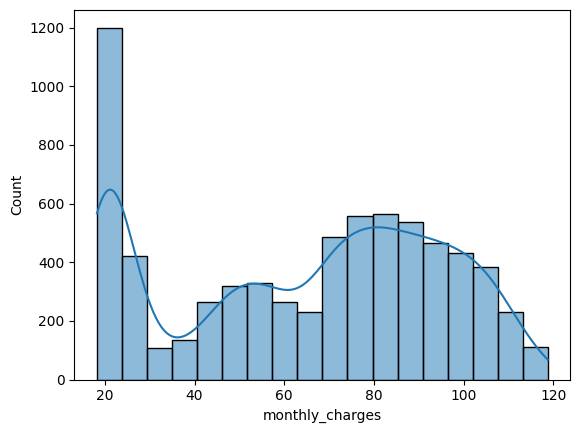

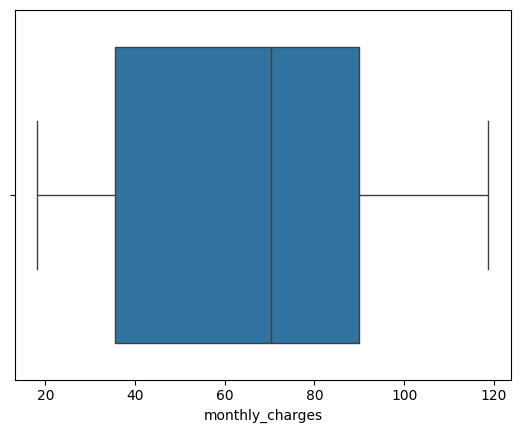

In [33]:
sns.histplot(data['monthly_charges'], kde=True)
plt.show()

sns.boxplot(x=data['monthly_charges'])
plt.show()

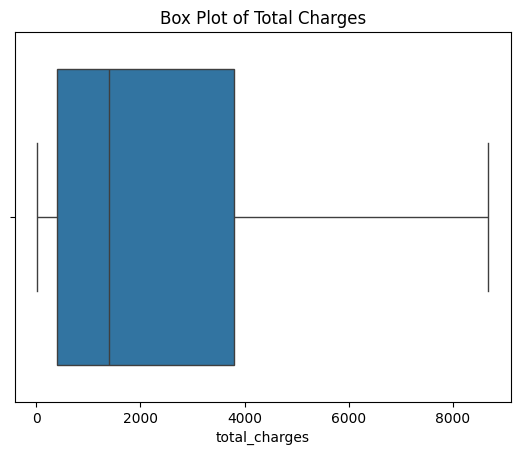

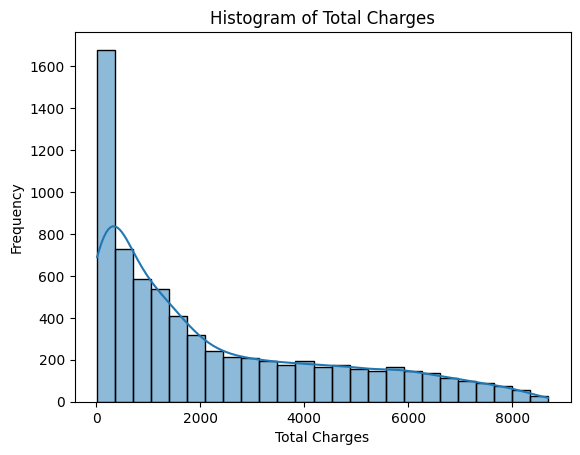

In [34]:
sns.boxplot(x=data['total_charges'])
plt.title('Box Plot of Total Charges')
plt.show()

sns.histplot(data['total_charges'], kde=True)
plt.title('Histogram of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

It looks like there are no outliers in the monthly or total charges.

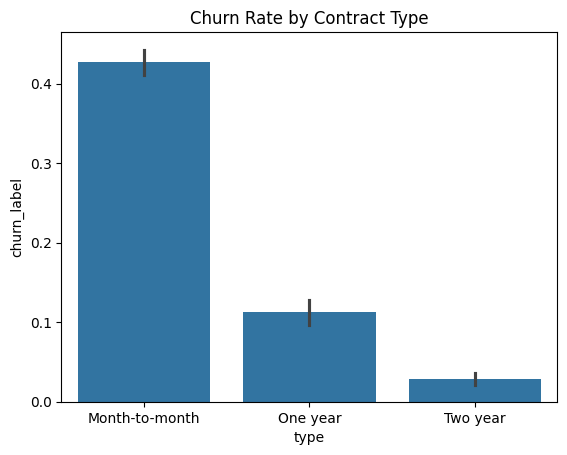

In [35]:
sns.barplot(x='type', y='churn_label', data=data)
plt.title('Churn Rate by Contract Type')
plt.show()

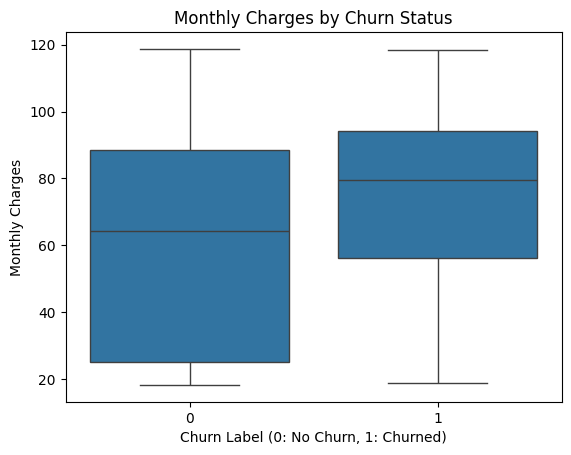

In [36]:
# Creating a box plot for monthly_charges segmented by churn_label
sns.boxplot(x='churn_label', y='monthly_charges', data=data)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn Label (0: No Churn, 1: Churned)')
plt.ylabel('Monthly Charges')
plt.show()

The higher median and IQR for churned customers suggest a potential price sensitivity factor contributing to churn. Customers on higher monthly charges may perceive less value or may be more inclined to switch if they receive a competitive offer from another provider.

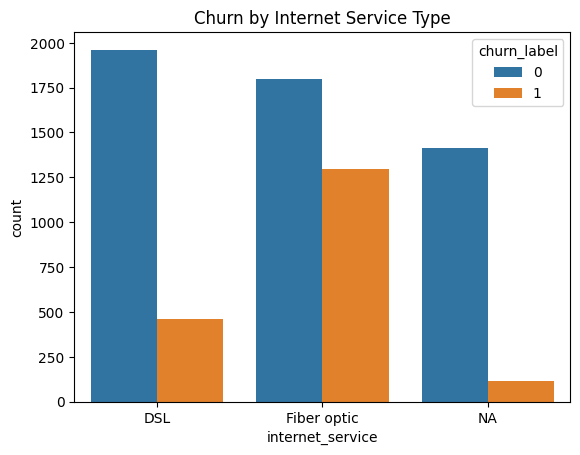

In [37]:
# Example of churn by internet service
sns.countplot(x='internet_service', hue='churn_label', data=data)
plt.title('Churn by Internet Service Type')
plt.show()


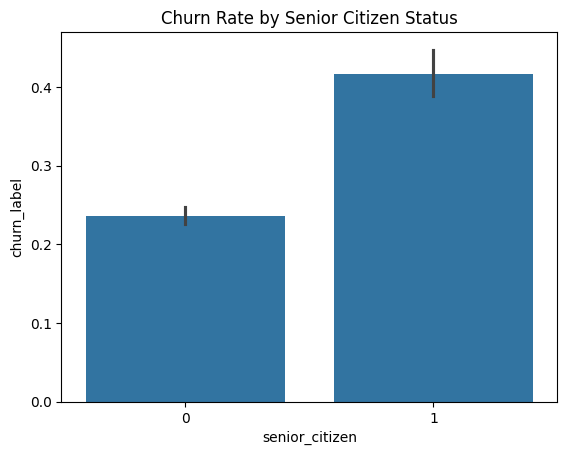

In [38]:
# Example of churn by senior citizen status
sns.barplot(x='senior_citizen', y='churn_label', data=data)
plt.title('Churn Rate by Senior Citizen Status')
plt.show()


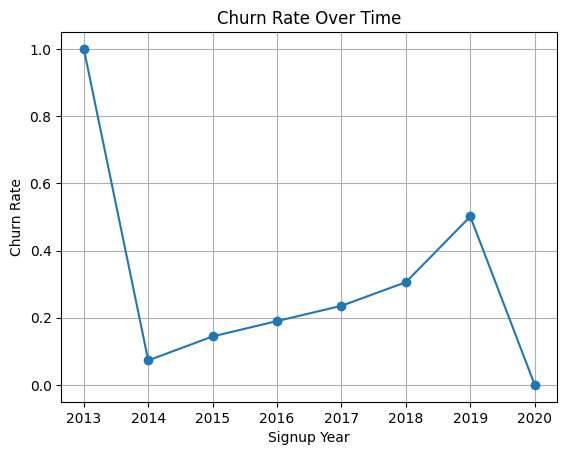

In [39]:
# First, ensure the 'begin_date' is a datetime object
data['begin_date'] = pd.to_datetime(data['begin_date'], format='%Y-%m-%d')

# Then, extract the year from 'begin_date' to create a 'signup_year' column
data['signup_year'] = data['begin_date'].dt.year

# Now, group the data by 'signup_year' and calculate the mean churn for each year
churn_by_year = data.groupby('signup_year')['churn_label'].mean()

# Finally, plot the churn rate over time
churn_by_year.plot(kind='line', marker='o')
plt.title('Churn Rate Over Time')
plt.ylabel('Churn Rate')
plt.xlabel('Signup Year')
plt.grid(True)
plt.show()


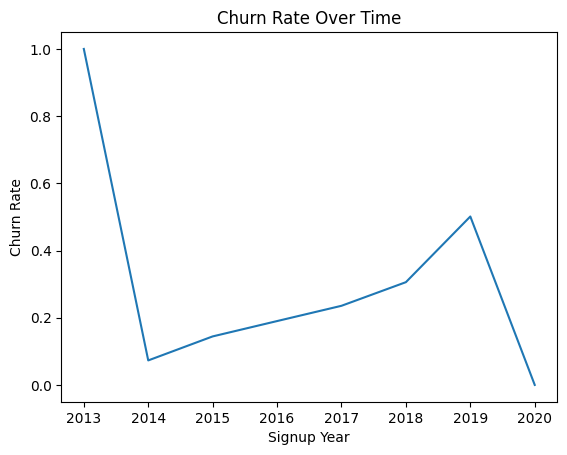

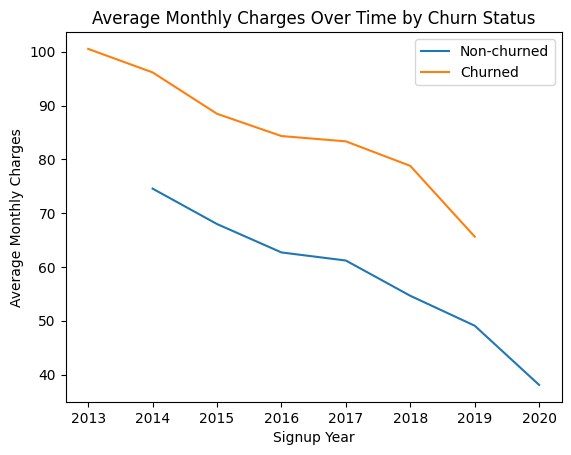

In [45]:
# Calculate the average monthly and total charges by signup year and churn label
avg_charges_by_year = data.groupby(['signup_year', 'churn_label']).agg({
    'monthly_charges': 'mean',
    'total_charges': 'mean'
}).reset_index()

# Pivot the data to have separate columns for churned and non-churned average charges
pivot_avg_charges = avg_charges_by_year.pivot(index='signup_year', columns='churn_label', values=['monthly_charges', 'total_charges'])

# Reset the column names after pivoting
pivot_avg_charges.columns = ['_'.join(str(s) for s in col) for col in pivot_avg_charges.columns]

# Calculate churn rate by signup year
churn_rate_by_year = data.groupby('signup_year')['churn_label'].mean().reset_index()

# Merge the churn rate with the pivot table of average charges on signup_year
churn_analysis = churn_rate_by_year.merge(pivot_avg_charges, left_on='signup_year', right_index=True)

# Visualize the churn rate over time
sns.lineplot(data=churn_analysis, x='signup_year', y='churn_label')
plt.title('Churn Rate Over Time')
plt.ylabel('Churn Rate')
plt.xlabel('Signup Year')
plt.show()

# Plot average monthly charges for non-churned customers
sns.lineplot(data=churn_analysis, x='signup_year', y='monthly_charges_0', label='Non-churned')

# Plot average monthly charges for churned customers
sns.lineplot(data=churn_analysis, x='signup_year', y='monthly_charges_1', label='Churned')

plt.title('Average Monthly Charges Over Time by Churn Status')
plt.ylabel('Average Monthly Charges')
plt.xlabel('Signup Year')
plt.legend()  # This will automatically use the labels specified in the lineplot calls
plt.show()


Customers who eventually churn consistently have higher average monthly charges than those who do not churn, regardless of the year they signed up.  There is a general downward trend in average monthly charges for customers who remain with the company.

C:\Users\cosmi\AppData\Local\Temp\ipykernel_28596\2913202443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['total_charges'] = pd.to_numeric(correlation_data['total_charges'], errors='coerce')


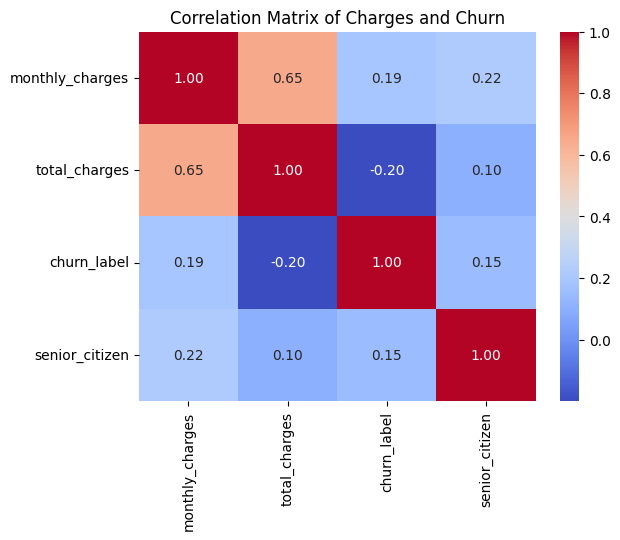

In [46]:
# Select the relevant columns for correlation analysis
correlation_data = data[['monthly_charges', 'total_charges', 'churn_label', 'senior_citizen']]

# Convert 'total_charges' to numeric and coerce errors to NaN to handle non-numeric data
correlation_data['total_charges'] = pd.to_numeric(correlation_data['total_charges'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Charges and Churn')
plt.show()